In [1]:
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import csv

In [2]:
batch_size = 10
num_classes = 10
epochs = 50
latent_dim = 128

In [3]:
with open('../verification_set_GAN.csv', newline='') as f: # Load dataset
    reader = csv.reader(f)
    train_x = [ [int(g) for g in image ] for image in list(reader) ] # Convert text to integers

In [4]:
#(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train, x_test = np.array(train_x), np.array(train_x)
y_train = np.eye(10)
y_test = y_train.copy()

# Scale the pixel values to [0, 1] range, add a channel dimension to
# the images, and one-hot encode the labels.
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = np.reshape(x_train, (-1, 28, 28, 1))
x_test = np.reshape(x_test, (-1, 28, 28, 1))

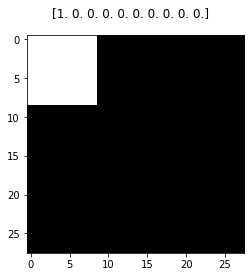

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [5]:
def plot_digit(i: int, title = "") -> int:
    """Plot the i-th digit in the training set, returns the plotted digit"""
    image = x_train[i]# plot the sample
    fig = plt.figure
    plt.suptitle(str(y_train[i]) + title)
    plt.imshow(image, cmap='gray')
    plt.show()
    return y_train[i]
plot_digit(0)

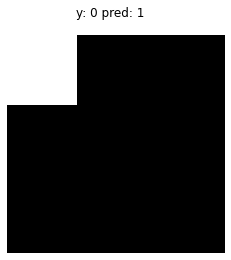

In [6]:
def plot(x, y, y_pred):
    fig = plt.figure
    plt.suptitle("y: " + str(y) + " pred: " + str(y_pred))
    plt.axis("off")
    plt.imshow(x, cmap='gray')
    plt.show()
    
plot(x_train[0], y_train[0].argmax(), 1)

In [7]:
(a, _), (_, _) = keras.datasets.mnist.load_data()
y_train[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

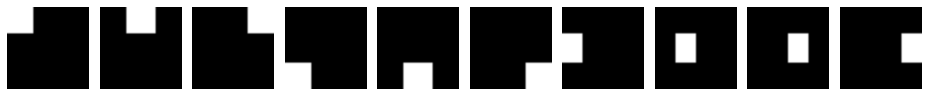

In [8]:
fig, axs = plt.subplots(1, 10)

for i in range(1):
    for j in range(10):
        
        #axs[i, j].set_title(y_train[i*5+j].argmax(), fontsize="x-large")
        axs[j].imshow(x_train[i*5+j], cmap='gray')

        axs[j].axis('off')

   
fig.set_size_inches(13, 4.8)     
fig.tight_layout() 
plt.show()   
plt.close() 

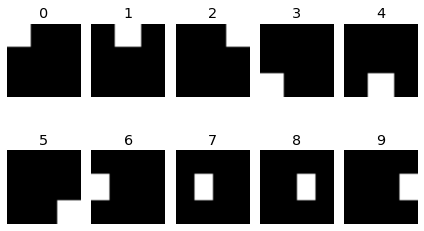

In [9]:
fig, axs = plt.subplots(2, 5)

for i in range(2):
    for j in range(5):
        
        axs[i, j].set_title(y_test[i*5+j].argmax(), fontsize="x-large")
        axs[i, j].imshow(x_test[i*5+j], cmap='gray')

        axs[i, j].axis('off')

   
fig.tight_layout() 
plt.show()   
plt.close() 

In [10]:
model3 = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        
        layers.Conv2D(32, (3,3)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(48, (3,3)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(64, (3,3)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(80, (3,3)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(96, (3,3)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(112, (3,3)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, (3,3)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(144, (3,3)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(160, (3,3)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(176, (3,3)),
        layers.LeakyReLU(alpha=0.2),
        
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
        
    ],
    name="m3"
)

model5 = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        
        layers.Conv2D(32, (5,5)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(64, (5,5)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(96, (5,5)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, (5,5)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(160, (5,5)),
        layers.LeakyReLU(alpha=0.2),
        
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
        
    ],
    name="m5"
)

model7 = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        
        layers.Conv2D(48, (7,7)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(96, (7,7)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(144, (7,7)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(192, (7,7)),
        layers.LeakyReLU(alpha=0.2),
        
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
        
    ],    
    name="m7"
)
generator = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)),
        
        layers.Dense(7 * 7 * 128),
        layers.LeakyReLU(alpha=0.2),
        layers.Reshape((7, 7, 128)),
        
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        
        layers.Conv2D(1, (7, 7), padding="same", activation="sigmoid"),
    ],
    name="generator",
)


discriminator = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        
        layers.Conv2D(64, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(64, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        
        layers.Flatten(),
        
        layers.Dense(1),
    ],
    name="discriminator",
)

In [11]:
class GAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(GAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, real_images):
        if isinstance(real_images, tuple):
            real_images = real_images[0]
            
        # Sample random points in the latent space
        batch_size = tf.shape(real_images)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Decode them to fake images
        generated_images = self.generator(random_latent_vectors)

        # Combine them with real images
        combined_images = tf.concat([generated_images, real_images], axis=0)

        # Assemble labels discriminating real from fake images
        labels = tf.concat(
            [tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0
        )
        # Add random noise to the labels - important trick!
        #labels += 0.05 * tf.random.uniform(tf.shape(labels))

        # Train the discriminator
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        # Sample random points in the latent space
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Assemble labels that say "all real images"
        misleading_labels = tf.zeros((batch_size, 1))

        # Train the generator (note that we should *not* update the weights
        # of the discriminator)!
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))
        return {"d_loss": d_loss, "g_loss": g_loss}


In [12]:
decay_steps = x_train.shape[0] / batch_size

lr3 = keras.optimizers.schedules.ExponentialDecay(
    0.001, decay_steps, 0.98, staircase=True
)
lr5 = keras.optimizers.schedules.ExponentialDecay(
    0.001, decay_steps, 0.98, staircase=True
)
lr7 = keras.optimizers.schedules.ExponentialDecay(
    0.001, decay_steps, 0.98, staircase=True
)

model3.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr3),
              metrics=["accuracy"])
model5.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr5),
              metrics=["accuracy"])
model7.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr7),
              metrics=["accuracy"])

cond_gan = GAN(
    discriminator=discriminator, generator=generator, latent_dim=latent_dim
)
cond_gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0003),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0003),
    loss_fn=keras.losses.BinaryCrossentropy(from_logits=True),
)

In [13]:
model3.evaluate(x_test, y_test)
model5.evaluate(x_test, y_test)
model7.evaluate(x_test, y_test)

1/1 [==============================] - 0s 442ms/step - loss: 2.3026 - accuracy: 0.1000


[2.3025598526000977, 0.10000000149011612]

In [14]:
def evaluate(predictfun):
    total = 0
    correct = 0

    preds = predictfun(x_test).round()

    for (x,y) in zip(preds, y_test):
        total += 1
        if((x == y).all()):
            correct += 1

    print(f"{correct} / {total}")

def ensemblepredict(xset):
    preds3 = model3.predict(xset)
    preds5 = model5.predict(xset)
    preds7 = model7.predict(xset)
    
    r = []
    for (x,y,z) in zip(preds3, preds5, preds7):
        if (x.round() == y.round()).all() or (x.round() == z.round()).all():
            r.append(x.round())
            
        elif (y.round() == z.round()).all():
            r.append(y.round())
            
        else:
            val = (x + y + z)
            val = (val == val.max()).astype(int)
            r.append(val)
            #print("---")
            #print(x)
            #print(y)
            #print(z)
            #print(val)
            
    return np.asarray(r)


In [15]:
ensemblepredict(x_test).round()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
evaluate(model3.predict)
evaluate(model5.predict)
evaluate(model7.predict)
evaluate(ensemblepredict)


0 / 10
0 / 10
0 / 10
0 / 10


In [17]:
#preds = model3.predict(x_test).round()
#preds = model5.predict(x_test).round()
#preds = model7.predict(x_test).round()
preds = ensemblepredict(x_test).round()

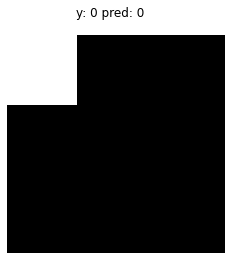

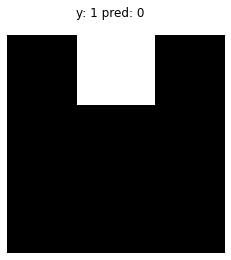

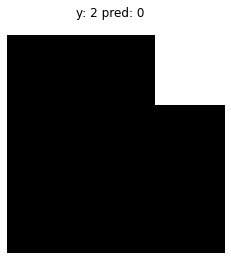

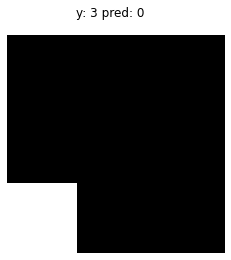

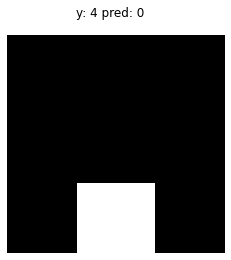

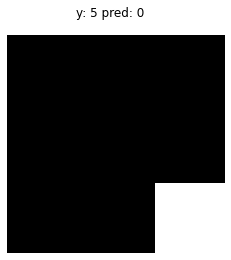

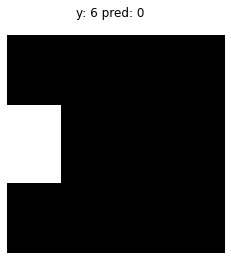

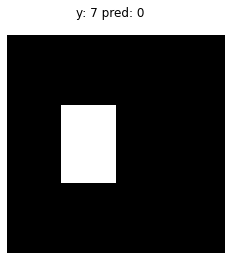

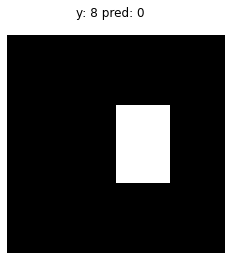

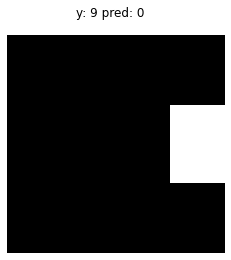

In [18]:
i = 0
for (im, y_pred, y) in zip(x_test, preds, y_test):
    if ((y_pred != y).any()):
        #print(y)
        #print(y_test)
        plot(im, y.argmax(), y_pred.argmax())
    i += 1

In [19]:
def generate_digit():
    
    noise = np.random.randn(latent_dim)
    gen_input = tf.reshape(noise, (1, latent_dim))
    
    image = generator.predict(gen_input)
    disresult = discriminator.predict(image)[0][0]
    p = ensemblepredict(image).argmax(axis=-1)[0]
    
    
    image *= 256
    image = image.astype(np.uint8)
    image = image[0]
    
    return (image, disresult, p)
    
    
def print_digit():
    (image, disresult, p) = generate_digit()
    fig = plt.figure
    plt.suptitle("d: " + str(disresult) + " pred: " + str(p))
    plt.imshow(image, cmap='gray')
    plt.show()
    plt.close()

def print_digits(r, c):
    fig, axs = plt.subplots(r, c)
    
    for i in range(r):
        for j in range(c):
            (image, disresult, p) = generate_digit()  
            
            #axs[i, j].set_title(str(p), fontsize="x-large")
            axs[i, j].imshow(image, cmap='gray')
            axs[i, j].axis('off')
    
    fig.set_size_inches(13, 4.8)     
    fig.tight_layout() 
    plt.show()   
    plt.close() 

In [20]:
#print_digits(4,10)
#discriminator.predict(x_train)

In [21]:
model3.save("model3")
model5.save("model5")
model7.save("model7")
generator.save("generator")
discriminator.save("discriminator")


INFO:tensorflow:Assets written to: model3\assets
INFO:tensorflow:Assets written to: model5\assets
INFO:tensorflow:Assets written to: model7\assets
INFO:tensorflow:Assets written to: generator\assets
INFO:tensorflow:Assets written to: discriminator\assets


In [22]:
images = [None]*11
def train(n):
    cond_gan.fit(x_train, y_train, batch_size=batch_size, epochs=n, verbose=0)
    
def makesaveprint():
    fig, axs = plt.subplots(4, 1)
    ims = []
    for j in range(4):
        (image, disresult, p) = generate_digit()  
        ims.append(image)
        
        #axs[i, j].set_title(str(p), fontsize="x-large")
        axs[j].imshow(image, cmap='gray')
        axs[j].axis('off')
    
    fig.set_size_inches(13, 4.8)     
    fig.tight_layout() 
    plt.show()   
    plt.close() 
    

In [23]:

def print_digits_train(r, c, epochs):
    fig, axs = plt.subplots(r, c)
    
    for j in range(c):
        train(epochs)
        for i in range(r):
            (image, disresult, p) = generate_digit()
            
            #axs[i, j].set_title(str(p), fontsize="x-large")
            axs[i, j].imshow(image, cmap='gray')
            axs[i, j].axis('off')
        
    
    fig.set_size_inches(13, 4.8)     
    fig.tight_layout() 
    plt.show()   
    plt.close() 

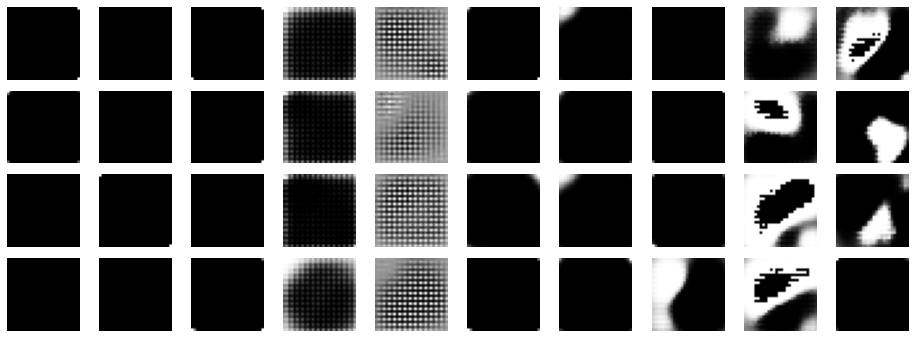

In [24]:

print_digits_train(4, 10, 50)